# **Gradient Descent**

Last time, we implemented the simple linear regression using Ordinary Least Squared Method. OLS is perfect for one independent variable, but it gets messy when there are more independent variables. We find the least amount of squared difference in actual vs predicted value in OLS. 

However, gradient descent is different. It is a way to find the minimum value of a function, by iteratively taking steps in the direction of the steepest descent of the function

Yeah Yeah. 

In OLS we straight forward derived the best slope (m) for ``y = mx + c``, but gradient descent takes it further.

With gradient descent we can get 3 values with the calculation at once. ``Least squares``, ``slope (m)`` and ``intercept (c)``

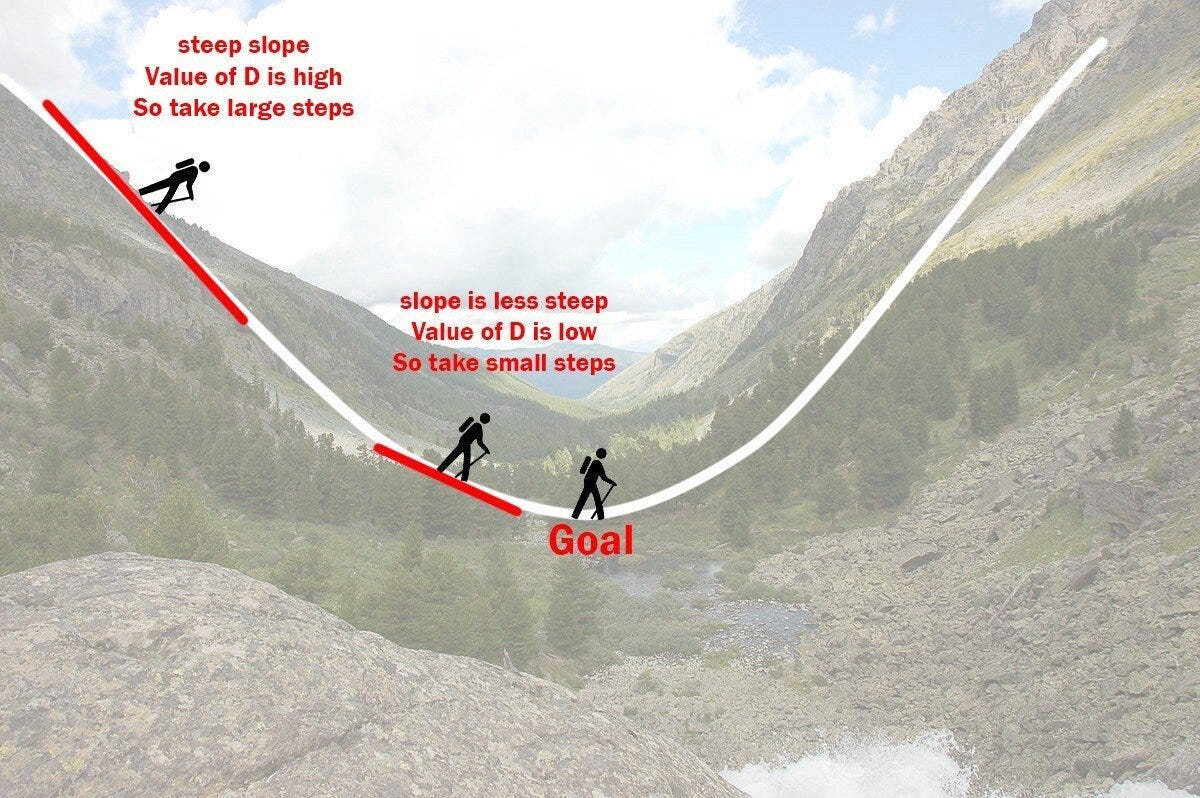

Credit: Machine Learning Geek


In [1]:
from IPython.display import Image, display
display(Image('/kaggle/input/my-gd-image/gradient-descent.jpg', width=450))
print("Credit: Machine Learning Geek")

Imagine you are on the one side of a U-shaped steep hill, and you are blind folded. Your mission is to get to the lowest point of that steep. How would you do it? When you take a step, you would probably feel steepness benath you. And by following that steepness, you would take one step at a time until you reached the minimum point or a "valley", and you would stop there until uphill starts.

This is the best way to imagine Gradient Descent.

The term gradient refers to *gradual* and descent refers to *going downwards*. That's exactly what we do with the help of gradient descent. We take the dummy slope and intercept, then we iterate those value until the difference of last ``m`` and ``c`` is close to 0.0001 or very small.